<a href="https://colab.research.google.com/github/martinpius/iml_exercise/blob/main/Sheet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpretable Machine Learning
## Exercise Sheet: 5
## This exercise sheet covers chapters 8.3 and 8.5 from the IML book by Christoph Molnar

Kristin Blesch (blesch@leibniz-bips.de)<br>
Niklas Koenen (koenen@leibniz-bips.de)
<hr style="border:1.5px solid gray"> </hr>

# 1) Feature Interaction

#### Explain feature interaction and give an example. What challenges arise for interpretability methods? 


* ## Given the dataset, interaction between two or more variable occurs if the effect of one feature relies on the value of other feature(s). Consequently , for the resulting model we cannot express the prediction in terms of sums of the feature effects.
* ## In other words, the interaction between two or more features is the change in the prediction that occurs by varying the features after considering the individual feature effects.
*## The strength of interaction effect can be estimated by computing the H-statistic score which measures how much the variation in the prediction is related to interaction effect.
* ## Example
* ## Consider a the prediction of BMI of a person based on gender and weight. If a person is above 70 kg and a female then BMI > 30. From this setting we can clearly see the interaction between gender and weight and we cannot express BMI as simple sums of main effects.
*## Challenges for interpretabilty tools
* ## We cannot apply model agnostic tools that are prone to interaction effect. For example the patial dependence plot will gives a bias results if variables are interacting






# 2) Permutation Feature Importance

#### a) What is permutation feature importance? Does this importance measure take into account feature interaction explicitly?  



* # The idea behind permutation feature importance relies on the destruction of information carried out by the predictors. When a feature is usefull for the prediction, reshaffling its values randomly will decrease the model's score.
* # The importance of the feature is determined by the amount of quality reduction of the predictions. The feature is termed to be more important if the decrease in prediction score is higher after the feature values destruction and vice-versa. 
* # Permutation feature importance automatically account for the interaction effect because when the feature values are permuted by default the interaction with other variables in the data is destroyed.




#### b) Remember that we had fitted a decision tree classifier to the iris data set two weeks ago. For this model, calculate the permutation feature importance.


In [4]:
#!pip install eli5

In [5]:
from sklearn.datasets import load_iris
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
iris = load_iris()
feature_names = iris.feature_names
target_names = iris.target_names
X = iris.data
Y = iris.target
dfm = pd.concat([pd.DataFrame(data = X, columns= feature_names), pd.DataFrame(Y, columns = ["target"])], axis = 1)

In [7]:
display(dfm.head(6))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


<Figure size 864x684 with 0 Axes>

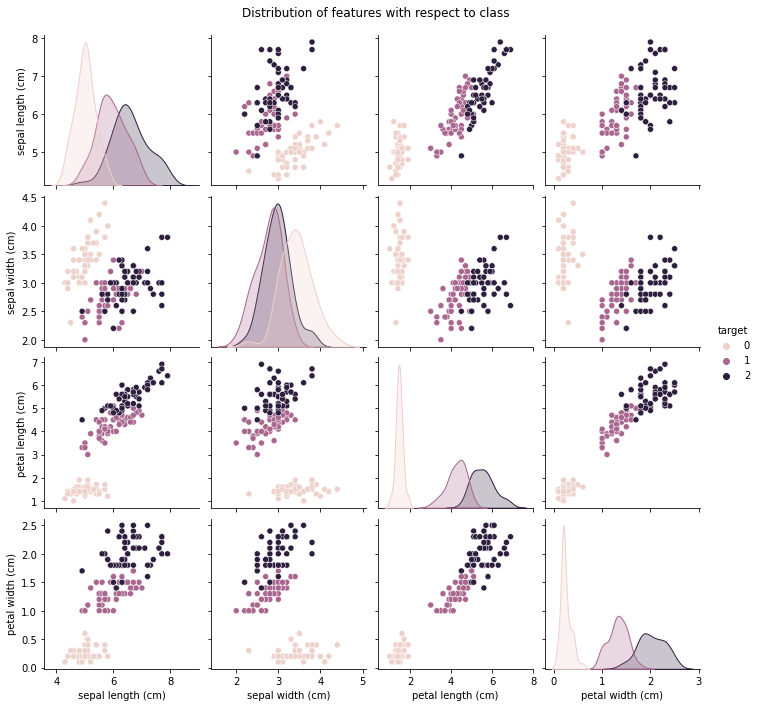

In [8]:
plt.figure(figsize = (12, 9.5))
sns.pairplot(dfm, hue = 'target')
plt.suptitle("Distribution of features with respect to class", fontsize = 12)
plt.subplots_adjust(top = 0.94)
plt.show()

In [9]:
# Compute the correlation matrix
corr = dfm.drop("target", axis = 1).corr()



In [10]:
print(f">>>> The correlation matrix for the data is:\n\n")
display(corr)

>>>> The correlation matrix for the data is:




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [11]:
# Training the decision tree and computing the permutation feature's importance

In [12]:
x_train, x_test, y_train, y_test = train_test_split(dfm.drop("target", axis = 1), dfm["target"], test_size = 0.2, random_state = 123)

In [13]:
print(f">>>> x_train_shape: {x_train.shape}, y_train_shape: {y_train.shape}\
\n>>>> x_test_shape: {x_test.shape}, y_test_shape: {y_test.shape}")

>>>> x_train_shape: (120, 4), y_train_shape: (120,)
>>>> x_test_shape: (30, 4), y_test_shape: (30,)


In [14]:
model = DecisionTreeClassifier().fit(x_train, y_train)

In [15]:
print(f">>>> Accuracy score is: {model.score(x_test, y_test) * 100:.2f} percent")

>>>> Accuracy score is: 93.33 percent


In [16]:
# Using the module eli5
perms = PermutationImportance(estimator = model, random_state = 123).fit(x_test, y_test)

In [17]:
vip = eli5.show_weights(estimator = perms, feature_names = x_test.columns.tolist())

In [18]:
print(f">>>> Permutation feature's importance using decision tree classifier:\n")
display(vip)

>>>> Permutation feature's importance using decision tree classifier:



Weight,Feature
0.5400 ± 0.1600,petal length (cm)
0.0933 ± 0.0499,petal width (cm)
0.0133 ± 0.0327,sepal length (cm)
0 ± 0.0000,sepal width (cm)


In [19]:
type(vip)

IPython.core.display.HTML

## Interpretation

*   ## From the result above, petal legth appeared the most important feature using decision tree classifier. On the average the accuracy of the classifier drops by 0.56 if we permute this variable. The variation decrease in accuracy is about 0.136 when we move from one reshaffling to another.
* ## Following the same manner of interpretation, the next important variable is petal width followed by sepal length and sepal width. 





#### c) Visualize the permutation feature importance results, i.e. plot the mean variable importances and the according standard deviations. What does this plot tell us?


In [25]:
from sklearn.inspection import permutation_importance

In [63]:
perm_sk = permutation_importance(estimator = model,
                                 X = x_test,
                                 y = y_test,
                                 random_state = 2,
                                 n_repeats = 50)

In [64]:
means_values = perm_sk.importances_mean
stdv_values = perm_sk.importances_std

In [65]:
data = pd.concat([pd.DataFrame(means_values, columns = ['mean_values']), pd.DataFrame(stdv_values, columns = ["std_values"])], axis = 1)

In [71]:
columns = ["petal_length", 'petal_width', "sepal_length", "sepal_width"]

In [79]:
data.sort_values(by = 'mean_values', axis = 0, ascending = True, inplace = True)

In [80]:
data["species"] = columns

In [81]:
display(data)

,mean_values,std_values,species
1,-0.001333,0.006532,petal_length
0,0.012000,0.038158,petal_width
3,0.093333,0.047610,sepal_length
2,0.482000,0.090237,sepal_width


([], <a list of 0 Text major ticklabel objects>)

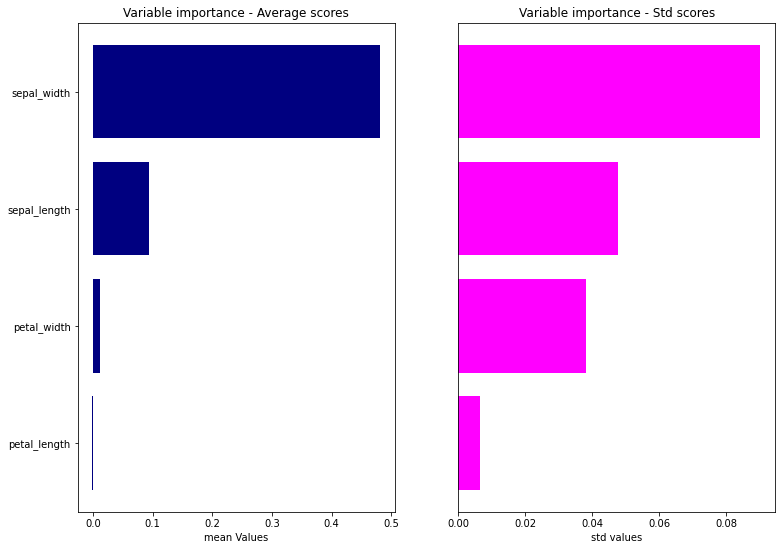

In [96]:
plt.figure(figsize = (12.5, 9))
plt.subplot(1, 2, 1)
plt.barh(data['species'], data['mean_values'], color = 'navy')
plt.xlabel("mean Values")
plt.title("Variable importance - Average scores")
plt.subplot(1,2, 2)
plt.barh(data["species"], data['std_values'], color = 'fuchsia')
plt.xlabel("std values")
plt.title("Variable importance - Std scores")
plt.yticks([])